# Regresión logística

#### Función logística
#### $$ g(z)=\frac{1}{1+e^{-z}} $$

In [1]:
 def g(z):
    return(1 / (1 + np.exp(-z)))

#### Hipótesis

#### $$h=g(X\theta)$$

In [2]:
def hipotesis(X, theta):
    return g(X.dot(theta))

#### Función de coste regularizada
#### $$J(\theta)=\dfrac{1}{m}\bigg(-y^{T}\log(h)-(1-y)^{T}\log(1-h)\bigg)+ \dfrac{1}{2C}\sum_{j=1}^{n}\theta_{j}^{2} $$

In [3]:
def computeCost(X, y, theta, C):
    m = y.size
    h = hipotesis(X, theta)    
    J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y)) \
               + (1/(2*C))*np.sum(np.square(theta[1:]))
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])
    return J

#### Gradiente
#### $$ \nabla J(\theta)=\dfrac{1}{m}X^{T}(h- y)+ \dfrac{1}{C} [ 0, \theta_{1}, \theta_{2}, ..., \theta_{n}]^{T}$$

In [4]:
def gradientReg(X, y, theta, C):
    m = y.size
    h = hipotesis(X, theta.reshape(-1,1))
    A = (1/m)*X.T.dot(h-y) 
    grad = A + (1/C)*theta.reshape(-1,1)
    grad[0] = A[0]
    return(grad.flatten())

Función con el algoritmo "Gradiente descendiente", dado $X, y, \alpha, \theta$ y número de iteraciones. <p>

Por defecto, toma el radio de aprendizaje 0.01 y el número de iteraciones 500.

Además, en el vector J_history guardamos el valor del coste en cada iteración, ésto nos permitirá evaluar la convergencia.

In [5]:
def gradientDescent(X, y, theta, C, alpha=0.01, num_iters=500):
    m = y.size
    J_history = np.zeros(num_iters)    
    for iter in np.arange(num_iters):
        theta = theta - gradientReg(X, y, theta, C)
        J_history[iter] = computeCost(X, y, theta, C)
    return(theta, J_history)

Importo los datos de la base de datos "dataLR.txt", la cual se puede encontrar en este repositorio. <p>
Observo el conjunto de individuos y su clasificación en un plot.

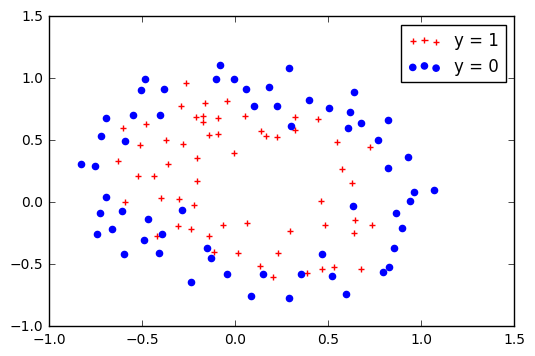

In [6]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("dataLR.txt", delimiter = ",")
X = np.c_[np.ones(len(data)),data[:,0:2]]
y = np.c_[data[:,2]]
def plotData(X, y):
    X1 = X[:,1:2]
    X2 = X[:,2:3]
    plt.scatter(X1[y==1], X2[y==1], color="red", marker = "+")
    plt.scatter(X1[y==0], X2[y==0], color = "blue", marker = "o")
    plt.legend(['y = 1', 'y = 0'])
plotData(X, y)
plt.show()

Observamos que es necesaria la creación de nuevas variables para separar las dos clases porque existen relaciones no lineales.

Vamos a generar todas las posibles combinaciones de variables con grado $\leq6$, es decir,

$x_{1}^{a}x_{2}^{b} \ \ \ \ \forall a,b \ \ \ \text{con } \ \ \ a+b \leq 6$ siendo $x_{1}, x_{2}$ las dos variables iniciales en los datos

Utilizamos la siguiente función

In [7]:
def mapFeature(X1, X2):    
    import scipy.special

    degree = 6
    X1 = np.reshape(X1,newshape= (np.size(X1),1))
    output = X1[:, 0:1]
    for i in range(1, degree + 1):
        for j in range(0, i + 1):              
                f = (X1** (i - j) * (X2 ** j))
                output = np.append(output, f, axis = 1)
    return output

#### Mapeamos los datos, obteniendo unos nuevos con 28 atributos

In [8]:
X_map = mapFeature(X[:,1:2], X[:,2:3])
print('La dimension de nuestro nuevo X es ', np.shape(X_map))

La dimension de nuestro nuevo X es  (118, 28)


Tomo parámetro regularizador C=100, calculo el coste inicial para un $\theta=[0,...,0]$ vector nulo, posteriormente aplico el algoritmo del gradiente descendiente obteniendo el nuevo valor para $\theta$ y el coste mínimo.<p>
Realizo una gráfica con el valor del coste en función del número de iteraciones para asegurar la convergencia.

coste inicial 0.69314718056
fit_parameters:  [ 1.18440277  0.32675695  0.32675695  1.08060848 -1.86873705 -0.81574977
 -1.30574641  0.01786784 -0.32003338 -0.36283633 -0.16828979 -1.34980433
 -0.0551805  -0.56280365 -0.24618592 -1.10292281 -0.26444487 -0.1842928
 -0.06028994 -0.24652114 -0.27458347 -0.44181359 -0.96522416  0.0185054
 -0.26867337  0.00827447 -0.297876   -0.12676659 -0.87147407]
coste final 0.539056701357


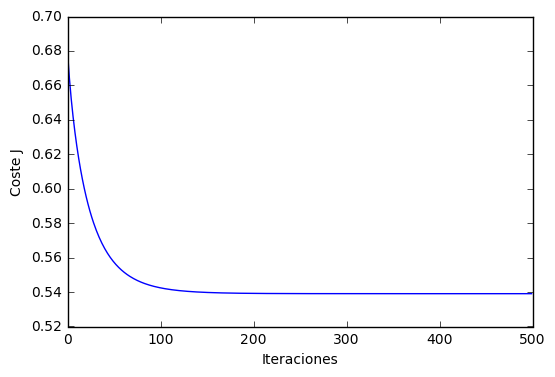

In [9]:
initial_theta = np.zeros(X_map.shape[1])
cost0 = computeCost(np.c_[np.ones(X_map.shape[0]), X_map], 
                    y, np.zeros(X_map.shape[1]+1), C=100)
print('coste inicial', cost0)
fit_parameters , Cost_J = gradientDescent(np.c_[np.ones(X_map.shape[0]),
                           X_map], y, np.zeros(X_map.shape[1]+1), C=100)
print('fit_parameters: ',fit_parameters.ravel())
costF = computeCost(np.c_[np.ones(X_map.shape[0]), X_map],
                    y, fit_parameters, C=100)
print('coste final', costF)
plt.plot(Cost_J)
plt.ylabel('Coste J')
plt.xlabel('Iteraciones')
plt.show()

Creamos una función que dibuje la frontera de decisión tomando $p=0.5$, para ello dibujamos la curva de nivel con $z=\theta^{T}X=0$.

$$y=1 \Leftrightarrow h_{\theta}(x)=g(\theta^{T}x) \geq \text{0.5} \Leftrightarrow \dfrac{1}{1+e^{-\theta^{T}x}}  \geq \text{0.5} \Leftrightarrow 1 \geq e^{-\theta^{T}x} \Leftrightarrow \theta^{T}x \geq 0$$

In [10]:
def plotBoundary(parameters):
    u = np.linspace(-1, 1.5, 100)
    v = np.linspace(-1, 1.5, 100)
    z = np.zeros(shape=(len(u), len(v)))
    theta  = parameters[1:29].reshape(1,28)
    theta0 = parameters[0:1]
    for i in range(len(u)):
        for j in range(len(v)):
            Xi = mapFeature(np.array(u[i]), np.array(v[j]))
            z[i, j] = np.dot(theta,Xi.T) + theta0
    z = z.T
    plt.contour(u, v, z, levels = [0])

Observamos la frontera de decisión que hemos encontrado utilizando nuestra propia implementación del modelo de regresión logística.

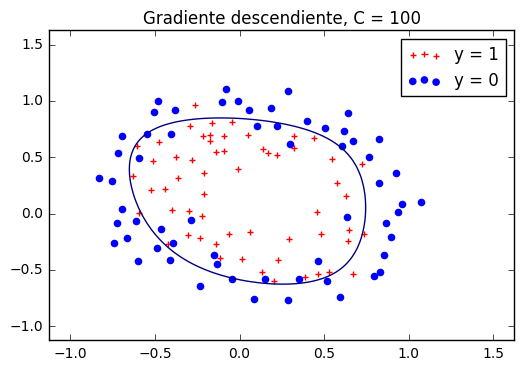

In [11]:
plotBoundary(fit_parameters)
plotData(X, y)
plt.title('Gradiente descendiente, C = %i' % 100)
plt.show()

No es recomendable utilizar implementaciones propias y aún menos la mía en este tipo de problema. 

Las implementaciones que existen en Python (scikit-learn), están infinitamente mejor optimizadas y han sido realizadas por expertos.

A partir de este momento, siempre que utilicemos la regresión logística será con scikit-learn.

In [12]:
from sklearn import linear_model

reg = linear_model.LogisticRegression(C=100, max_iter = 100, tol= 1e-8)
reg.fit(X_map, np.ravel(y))
reg.densify()
reg.coef_ , reg.intercept_
fit_parameters = np.c_[reg.intercept_, reg.coef_][0]
print('Parámetros Scikit-learn C=100',fit_parameters)

Parámetros Scikit-learn C=100 [ 3.75204439  1.02913354  1.02913354  4.61610589 -5.46675189 -6.6597284
 -5.96003152  2.0444613  -0.11606988  2.3943282  -2.51240894 -3.78888438
  2.99105472 -3.75579183 -1.97700308 -6.3164633  -1.69067293 -0.8796918
  5.02529884 -3.63908601 -4.32151327  2.84641386 -5.45207101  0.45256875
 -0.86348981  3.20978422 -4.4989377  -3.62433536  0.27398974]


Dibujamos nuestra frontera de decisión con los parámetros obtenidos con scikit-learn. 

Observamos que es relativamente parecida a la que hemos obtenido con nuestra implementación para este problema en particular.

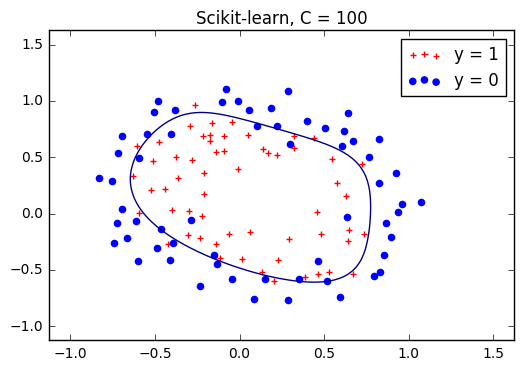

In [13]:
plotBoundary(fit_parameters)
plotData(X, y)
plt.title('Scikit-learn, C = %i' % 100)
plt.show()

# Overfitting / Underfitting

Vamos a exponer un ejemplo de overfitting y otro de underfitting. Primero vamos con el de overfitting, tomamos C=100000.

In [14]:
from sklearn import linear_model

reg = linear_model.LogisticRegression(C=100000)
reg.fit(X_map, np.ravel(y))
reg.densify()
fit_parameters = np.c_[reg.intercept_, reg.coef_][0]
print('Parámetros C =100000',fit_parameters)

Parámetros C =100000 [  4.78917542e+00   7.45236534e-01   7.45236534e-01   3.41617749e+00
  -3.82158397e+01  -1.46772720e+01  -3.48068307e+00  -1.72015604e+01
   8.82696100e+00   2.56058216e+01   3.79199335e-02   1.36847722e+02
   5.66529609e+01   7.33903707e+01   1.23631116e+01  -1.76275913e+01
   4.46157034e+01   6.99269435e+00  -8.62450966e+00  -1.41592664e+01
  -4.59637122e+00   2.30874458e+01  -1.73536690e+02  -1.08954158e+02
  -1.04627538e+02   1.00548896e+01  -1.33312742e+02  -7.64955147e+01
  -1.68740535e+01]


Dibujamos la frontera de decisión junto al nuevo punto que queremos clasificar.

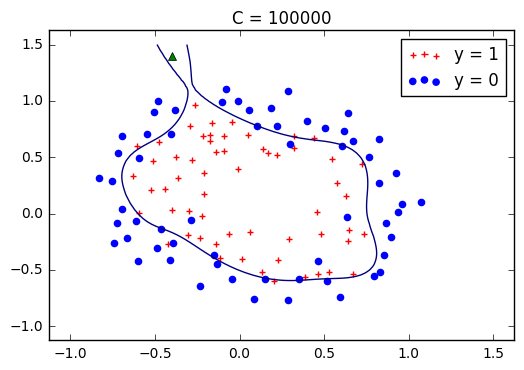

Observamos como la función hipótesis es demasiado compleja.
Ajusta muy bien la clasificación de los datos de entrenamiento.
Sin embargo, si tuvieramos que clasificar el punto (-0.4, 1.4)
(triángulo verde en la gráfica)
Tal y como está la frontera de decisión lo clasificaría como y=1
cuando lo lógico sería que se clasificara como y=0


In [15]:
plotBoundary(fit_parameters)
plotData(X, y)
plt.plot([-0.4],[1.4], 'g^')
plt.title('C = %i' % 100000)
plt.show()
print('Observamos como la función hipótesis es demasiado compleja.')
print('Ajusta muy bien la clasificación de los datos de entrenamiento.')
print('Sin embargo, si tuvieramos que clasificar el punto (-0.4, 1.4)')
print('(triángulo verde en la gráfica)')
print('Tal y como está la frontera de decisión lo clasificaría como y=1')
print('cuando lo lógico sería que se clasificara como y=0')

Ahora vamos con el ejemplo de underfitting, tomamos C=1/100


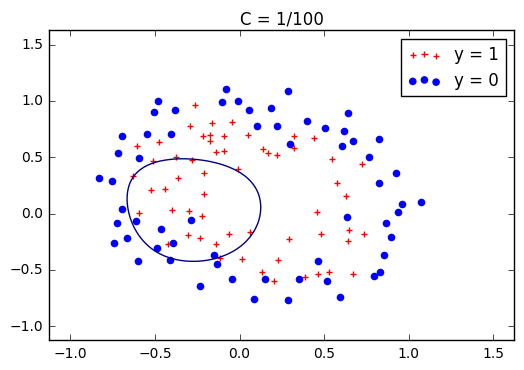

Podemos observar cláramente como la frontera de decisión
no divide correctamente las dos clases.
Esto es debido a alta bias en nuestro modelo, underfitting.


In [16]:
from sklearn import linear_model

reg = linear_model.LogisticRegression(C=1/100)
reg.fit(X_map, np.ravel(y))
reg.densify()
fit_parameters = np.c_[reg.intercept_, reg.coef_][0]
plotBoundary(fit_parameters)
plotData(X, y)
plt.title('C = 1/100')
plt.show()
print('Podemos observar cláramente como la frontera de decisión')
print('no divide correctamente las dos clases.')
print('Esto es debido a alta bias en nuestro modelo, underfitting.')